#### Задание 1

Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов:

A - результаты для выборки людей получающих препарат А.

B - результаты для другой выборки людей, получающих препарат B.

In [17]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import numpy as np
from IPython.display import Image
from scipy.stats import f_oneway
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu


In [10]:
np.random.seed(11)
A = stats.norm.rvs(scale=30,loc=11,size=100)
B = A + stats.norm.rvs(scale=54,loc=11,size=100)


In [12]:
# H0 - результаты выборок имеют одинаковое распределение, H1 - результаты выборок отличны

alpha = 0.05   # Уровень значимости
F, p = f_oneway(A, B)

print(F, p)

if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

3.0060646842692673 0.08451003973499746
Same distribution (fail to reject H0)


### Задание 2

Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.

А - те же люди, но без препарата

B - выборка, получающая препарат B

In [15]:
np.random.seed(11)
A_ = stats.norm.rvs(scale=30,loc=11,size=100)
B_ = A_ + stats.norm.rvs(scale=54,loc=11,size=100)

In [19]:
# H0 - эффекта от применения препарата нет, H1 - эффект есть

alpha = 0.05   # Уровень значимости
stat, p = mannwhitneyu(A_, B_)

print(stat, p)

if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

4343.0 0.054347680446611354
Fail to reject H0


### Задание 3

Допустим вы решили устроить дачный эксперимент:
* поливаем одни огурцы водой, 
* другие огурцы водой с удобрением, 
* третью группу огурцов будем поливать минералкой. 

Используя дисперсионный анализ, сделайте выводы о распределениях результатов. Если ли эффект от удобрения по сравнению с минералкой?¶


In [22]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]

nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]

mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [28]:
# H0 - значимых различий нет, H1 - удобрения влияют на результат

alpha = 0.05   # Уровень значимости
Fm, pm = f_oneway(water, mineral)
Fn, pn = f_oneway(water, nutri)

print(pm, pn)

if pm > alpha and pn > alpha:
    print('Fail to reject H0 in cases of mineral and nutri')
elif pn > alpha:
    print('Fail to reject H0 in cases of nutri')
elif pm > alpha:
    print('Fail to reject H0 in cases of mineral.', 'Effect of nutri application', pn)
else:
    print('Different distribution (reject H0)', 'эффект от удобрений больше минералки в', pn/pm)

0.9198340218471527 0.0001840453200503372
Fail to reject H0 in cases of mineral. Effect of nutri application 0.0001840453200503372


### Задание Cookie Cats

Проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 

Рассмотрите влияние A/B теста на удержание игроков.

In [45]:
data = pd.read_csv('AB_test/cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


userid - уникальный номер, идентифицирующий каждого игрока

version - был ли игрок в контрольной группе (gate_30 - ворота на уровне 30) или в тестовой (gate_40 - ворота на уровне 40).

sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки

retention_1 - игрок вернулся и играл через 1 день после установки?

retention_7 - игрок вернулся и играл через 7 дней после установки?

In [31]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


#### Ваши выводы:
Ожидаемо,что перенос ворот на 40 уровень увеличил число раундов, потому что часть не доходила до 40 уровня, но увеличение менее 2%, так что можно сказать, что на число раундов перенос не повлиял

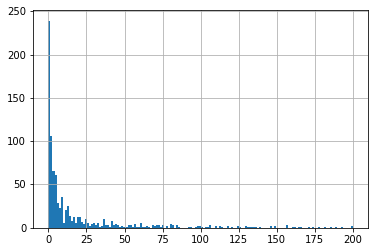

In [159]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins=150, range=[0, 200])

#### Ваши выводы:
Малочисленные группы с одним числом раундом встречаются чаще многочисленных. Число сыгранных раундов индивидуально, и по числу раундов игроки распределились равномерно.

Text(0.5, 0, '# Game rounds')

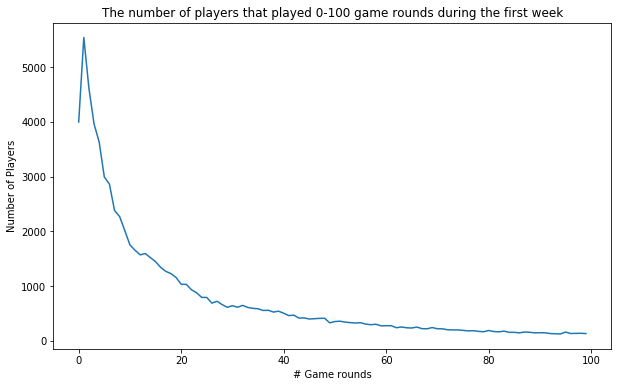

In [113]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

#### Ваши выводы:
Большая часть игроков играет мало раундов, до 30.

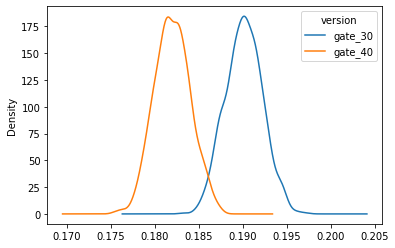

In [145]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 0.8,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

#### Ваши выводы:
Процент игроков вернувшихся после 7 (или одного) дней ниже в версии gate_40, чем в версии gate_30.
Предположительно, усталось от более длительной игры негативно сказывается на возврате к игре